# Lecture 5: Probability for Data Science

## 10/18/22

### Table of Contents
1. [Counting](#count)
2. [Probability](#prob)
3. [Random Variables](#rv)
4. [Expectation and Variance](#expvar)  
5. [Binomial Distribution](#binomial)
6. [Multinomial Distribution](#multinomial)
7. [Geometric Distribution](#geometric)
8. [Hypergeometric Distribution](#hypergeometric)
9. [References/Resources](#ref)

### Hosted by and maintained by the [Student Association for Applied Statistics (SAAS)](https://saas.berkeley.edu/).

### Presented by [James Cheng](jamescheng@berkeley.edu) and Claire Mai (Fall 2022).

In [1]:
# initial
# Setup code
import seaborn as sns
import csv
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

<a id='count'></a>
# Counting

***Permutation***: the ordered arrangement of k items out of a list of n. Calculated using the formula $_nP_k = \frac{n!}{(n-k)!}$ or use the built in function: <br><br>`scipy.special.perm(n,k,exact = False)` *(when exact = false, any floats are rounded to the nearest integer)*<br><br>For example, you and 4 other friends (Sarah, Skyler, Claire, James) are visiting Imm Thai for the first time. There are 6 different entrees you can order from the menu (Pad Thai, Pad Se Ew, Chicken Curry, Duck Curry, Noodle Soup, Fried Rice). You each want to order a different dish. Permutation is the different ordered arrangements you all can pick.<br><br> Do you think order matters in this case? Why?

**Question:** Write out some permutations for Imm Thai example <br>
*Answer*: We are permuting length five sequences out of six possible entrees. Below are some possible length five permutations, where the first item is yours, second item is Sarah's, third item is Skyler's, and fourth is Claire's, and fifth item is James'. In this case, order does matter because, for instance, Chicken Curry first (for you) is different from Chicken Curry last (for James).  
Chicken Curry, Duck Curry, Pad Thai, Pad Se Ew, Noodle Soup  
Noodle Soup, Pad Thai, Duck Curry, Pad Se Ew, Chicken Curry  

**Question:** use the formula or function provided above, calculate the permutation. What is n? What is k? <br>
*Answer*: n = 6, k = 5

In [2]:
# your code here
scipy.special.perm(6, 5)

720.0

***Combination***: all possible groupings of k items out of n items where order does not matter. Calculated using the formula $_nC_k = \binom{n}{k} = \frac{n!}{(n-k)!k!}$ or using the built in function: <br><br> `scipy.special.comb(n,k,exact = False, repetition = False)` *(when repetition = True, each element can be used more than one time)*<br><br>
For example, the education committee needs to choose a group of 2 people to design and present the next CX lecture. Combination is the different possible groups we can choose. <br><br>
Does order matter in this case? Why?

Answer: Order does not matter in this case because having person 1 and person 2 presenting is the same thing is having person 2 and person 1 presenting. What matters is who person 1 and person 2 are, not the order that they are chosen in.

**Question:** The education committee lecturers include Ashwin, Carlos, Claire, James, Robert, Sarang, Suparna, and Wenhao. Write out some lecturer combinations for the next CX lecture. <br>
Ashwin and Carlos. Robert and Minh. Wenhao and Suparna. (notice how ordering doesn't matter, i.e. Ashwin and Carlos is same as Carlos and Ashwin).  
<br> **Question:** Use the formula or function provided above, calculate the combination. What is n? What is k?

In [3]:
# your code here
scipy.special.comb(8, 2)

28.0

[Here](https://youtu.be/p8vIcmr_Pqo) is a helpful video that shows how to derive the formulas for permutation and combination.

<a id='prob'></a>
# Probability

How do you define probability?


<img src='lecture_images/prob_joke.jpg'>

One definition is the branch of mathematics that calculates, estimates, or simulates the likelihood of a given event. In today's lesson we will explore various probability properties, definitions, and distributions.

## Adding
**Mutually Exclusive/Disjoint**: Given two events, at most one can occur. Both events cannot occur simultaneously.

Examples: 
<ol>
<li>Flipping heads or tails in one coin toss</li>
<li>Getting an even or odd number in one roll of a die</li>
<li>Drawing a face card or number card from a standard deck of 52 cards</li>
<li><b>Fill this in with your own example</b></li>
</ol>


<img src="lecture_images/mutually_exclusive.png" alt="mutually_exclusive" width="500"/>

***Addition Rule***: If two events $A$ and $B$ are mutually exclusive, then the probability that either event will occur (the **union** of $A$ and $B$) is the sum of the probabilities that each individual event will occur, so $P(A \cup B) = P(A) + P(B)$.

**Exercise**: In the cell below, calculate the probability that either you draw a face card or a number card. 

**Hint**: A standard deck of 52 cards has 4 suites: Hearts, Spades, Clubs, Diamonds. Each suite has 3 face cards (King, Queen, and Jack) and 9 number cards (2 through 10).
<img src="lecture_images/card_suites.jpg" alt="card_suites" width="200"/>

In [4]:
prob_face_card = 12/52
prob_number_card = 36/52
prob_face_or_number = prob_face_card + prob_number_card
prob_face_or_number

0.9230769230769231

The Addition Rule can be expanded to multiple events, as long as they are all mutually exclusive. 

Given $n$ mutually exclusive events $A_1, A_2, ... , A_n$, then:

$$P(\bigcup_{i=1}^{n}A_i) = \sum_{i=1}^{n}P(A_i)$$

What happens when two events $A$ and $B$ are ***not*** mutually exclusive? 

This means there is a nonzero probability that both events occur, which is the **intersection** of $A$ and $B$. We denote this as the $P(A\cap B)$, which is often written as $P(A$ and $B)$ or $P(AB)$. The intersection is represented by the overlapping region in the figure below.

<img src="lecture_images/intersection.png" width="400"/>

In order to calculate the probability that either $A$ or $B$ occurs, we have to subtract the intersection of the two events otherwise we count this probability twice. This means that $$P(A\cup B) = P(A) + P(B) - P(A \cap B)$$.

**Exercise**: Suppose we randomly choose a CX member from the list of 12 names below. Calculate the probability that we choose either a name with more than 5 letters or a name with 2 syllables.
 - **List of CX members**: 
- Aathreya (3 syllables)
- Brandon (2 syllables)
- Elizabeth (4 syllables)
- Ethan (2 syllables)
- Evan (2 syllables)
- Gizell (2 syllables)
- Jon (1 syllable)
- Jinn (1 syllable)
- Rachel (2 syllables)
- Tom (1 syllable)
- Tiffany (3 syllables)
- Wenyi (2 syllables)

In [5]:
prob_more_than_5 = 7/12
prob_2_syllables = 6/12
prob_both = 3/12
prob_either = prob_more_than_5 + prob_2_syllables - prob_both
prob_either

0.8333333333333335

***Inclusion-Exclusion Principle***: The calculation of the union of events can also be extended to multiple, not necessarily mutually exclusive events. 

Given $n$ events $A_1, A_2, ... , A_n$, then:

$$P(\bigcup_{i=1}^{n}A_i) = \sum_{i=1}^{n}P(A_i) - \sum_{1\leq{i}<}\sum_{j\leq{n}}P(A_iA_j) + \sum_{1\leq{i}<}\sum_{j<k}\sum_{\leq{n}}P(A_iA_jA_k) - ... + (-1)^{n-1}P(A_1A_2...A_n)$$

This formula looks complicated but it's just the result of including the probabilities of all events, excluding intersections of two events, including intersections of three events, exlcuding intersections of four events, etc.

Check out this cool [matching problem](http://prob140.org/textbook/content/Chapter_05/03_The_Matching_Problem.html) using Inclusion-Exclusion.

***Complement***: Given an event $A$, the complement of $A$ (denoted by $A^C$) is the probability that $A$ does ***not*** happen. Since the total probability adds up to one, this means that $P(A^C) = 1 - P(A).$

<img src="lecture_images/complement.png" alt="complement" width="400"/>

**Note**: Sometimes, calculating the probability of the complement of an event is easier than calculating the probability of the event. In the example from earlier of calculating the probability of drawing either a face card or a number card, we might notice that Ace is the only card that is not a face or number card. 

**Exercise**: In the cell below, calculate the probability of ***not*** drawing an Ace.

In [6]:
# your code here
1 - 4/52

0.9230769230769231

Compare this with the probability we calculated before using the Addition Rule:

In [7]:
prob_face_or_number

0.9230769230769231

**Exercise (Monty Hall Problem)**: This is a puzzle based on an old American game show. There are three doors in front of you: behind two doors are goats, and behind one door is a prize car. You point to one of the doors. Then, the host opens one of the other two doors, and that door has a goat. Now, you can either stick to your initial choice or switch to the other unopened door. You win if you choose the door with the prize. Should you switch?

Answer: Yes, you should switch. Let's consider the probabilities of winning based on two strategies: 1. not switching and 2. switching. If you don't switch, the probability that you win is equal to the probability that the prize is behind the door you initially choose, which is $\frac{1}{3}$. If you switch, you will win if you initially choose a goat, so the probability that you win is $\frac{2}{3}$.

Here is a [video](https://www.youtube.com/watch?v=7WvlPgIjx_M&ab_channel=BonCrowderPresents) that explains the Monty Hall Problem using a probability tree (listing out possible outcomes). There are many ways to think about the problem!

## Multiplication

***Conditional Probability***: Suppose we have two events, $A$ and $B$. The conditional probability of $A$ given $B$, denoted as $P(A | B)$, is the probability that $A$ occurs, given that $B$ has already occurred. We calculate this with the following formula: $$P(A | B) = \frac{P(A \cap B)}{P(B)}$$

***Multiplication Rule***: The probability that both $A$ and $B$ occur can be calculated using conditional probability as defined above. 

$$P(A \cap B) = P(A | B) P(B)$$

**Exercise**: How would you calculate $P(A \cap B)$ using $P(B | A)$? Replace the question mark with your answer below.

$$P(A \cap B) = P(B | A) * P(A)$$

***Bayes' Rule***: Using $P(A \cap B) = P(A | B) P(B)$ and $P(A \cap B) = P(B | A) P(A)$, we can set both right hand sides equal to one another with $P(A | B) P(B) = P(B | A) P(A)$. Dividing both sides by $P(B)$, we get Bayes' Rule: $$P(A | B) = \frac{P(B | A) P(A)}{P(B)}$$.

Although we won't go in-depth into it now, Bayes' Rule is extremely useful for calculating conditional probabilities because sometimes $P(B|A)$ is much easier to calculate then $P(A|B)$.

**Exercise**: Here is a question posed by researcher and professor Chris Wiggins to a group of medical students: "A patient goes to see a doctor. The doctor performs a test with 99 percent reliability--that is, 99 percent of people who are sick test positive and 99 percent of the healthy people test negative. The doctor knows that only 1 percent of the people in the country are sick. Now the question is: if the patient tests positive, what are the chances the patient is sick?" 

In [8]:
# Your answer here
prob_positive_if_sick = 0.99
prob_positive_if_healthy = 0.01
prob_sick = 0.01
prob_healthy = 1 - prob_sick
prob_positive = prob_positive_if_sick*prob_sick + prob_positive_if_healthy*prob_healthy # Law of total probability
prob_sick_if_positive = prob_positive_if_sick * prob_sick / prob_positive # Applying Bayes' Rule
prob_sick_if_positive

0.5

Intuitively, you might have thought that $P(sick | positive)$ is 0.99! However, the actual probability is 0.5, which is much lower than we might've thought. The reason it is lower is that the probability of being sick in general is 0.01, which is very low! However, if 10% of the country are sick, then $P(sick | positive) = 0.9166$, which is much higher, as expected.

**Independence**: $A$ and $B$ are independent if $P(A|B) = P(A)$. This means that the outcome of $B$ does not affect the outcome of $A$ and vice versa. Using the Multiplication Rule, we can see that $P(AB) = P(A) * P(B)$ if A and B are independent.

**Exercise**: Using the complement rule and independence, calculate the probability that in 10 rolls of a fair die, at least one 6 is rolled.

In [9]:
# your code here
# P(at least one 6 rolled in 10 rolls) = 1 - P(zero 6's rolled in 10 rolls) = 1 - P(first roll not 6) * P(second roll not 6) * ... * P(tenth roll not 6)
p_no_6_rolled = (5/6)**10
p_atleast_one_6_rolled = 1 - p_no_6_rolled
p_atleast_one_6_rolled

0.8384944171101543

<a id='rv'></a>
# Random Variables
So far, we have been referring to events such as $A$ and $B$ but have not formally defined them as variables.

**Random Variable**: A numerical function defined on an outcome space.

In the example below, our random variable $X$ represents the toss of a coin where the outcome space is $\{H, T\}$.

<img src='lecture_images/random_variable.svg' width=400px>

**Note**: If the probability that the coin lands as heads is $p$ and the probability that the coin lands as tails is $1-p$, then $X$ has a **Bernoulli(p)** distribution. One toss of a fair coin has a $Bernoulli(.5)$ distribution. Rolling a 6 vs. any other number on a fair die has a $Bernoulli(1/6)$ distribution.


The code below gives us the outcome space of two tosses of a coin.

In [10]:
from itertools import product
one_toss = np.array(['H', 'T'])
two_tosses = list(product(one_toss, repeat=2))
two_tosses

[('H', 'H'), ('H', 'T'), ('T', 'H'), ('T', 'T')]

<a id='expvar'></a>
# Expectation and Variance
**Expectation**: The expected value of a random variable $X$ is the average of the possible values weighted by each respective probability. 

$$E(X) = \sum_{\text{all } x}xP(X=x)$$

For a $Bernoulli(p)$ variable $X$, we have the following possible values and their corresponding probabilities:

| Possible Values | Probability |
| -----------     | ----------- |
| 1               | $p$         |
| 0               | $1-p$       |

So the calculation of the expectation of $X$ is $E(X) = 1*P(X=1) + 0*P(X=0) = 1(p) + 0(1-p) = p$.

**Exercise**: What is the expected value of rolling a fair die? Use the cell below for calculations if you need it.

In [11]:
# Use this cell to calculate the expectation of rolling a fair die
(1+2+3+4+5+6)/6

3.5

The code below simulates 10,000 rolls of a fair die and calculates the mean. Compare this to your expected value.

In [12]:
die_rolls = []
for i in range(10000): # Try changing the number of rolls to see what happens
    one_roll = np.random.randint(1, 7)
    die_rolls.append(one_roll)
np.mean(die_rolls)

3.4551

The expectation of a random variable can be thought of as the long run average value of independently generated values of the variable.

**Linearity of Expectation**
<ol>
<li>The expected value of a constant is itself. So given a constant $c$, $E(c) = c$.</li>
<li>Expectation is <b>additive</b>. This means that for two random variables $X$ and $Y$, $E(X+Y) = E(X) + E(Y)$ </li>
</ol>

When we combine these two properties, we get the linearity of expectation.

For some constant $c$ and random variables $X$ and $Y$: $$E(cX+Y) = c*E(X) + E(Y)$$.

Note that there are no assumptions about $X$ and $Y$, they could be independent or dependent.

**Exercise**: Given $E(X) = 9$ and $E(Y) = 4$, replace the question mark with the answer to the equation below.

$$E(2X-3Y+6) = 2E[X] - 3E[Y] + E[6] = 2*9 - 3*4 + 6 = 18-12+6 = 12$$


**Variance**: The variance of a random variable $X$ (often denoted as $\sigma_{x}^2$) is the expected value of the square of deviations from the mean. 

$$Var(X) = \sigma_{x}^{2} = E((X-E(X))^2)$$ 

Let $E(X) = \mu_x$ then we have:

$$Var(X) = \sigma_{x}^{2} = E((X-\mu_x)^2)$$ 


**Standard Deviation**: The standard deviation of $X$ (often denoted as $\sigma_{x}$) is simply the square root of the variance. This puts the standard deviation in the same units as $X$ and $E(X)$. 

$$\sigma_x = \sqrt{E((X-\mu_x)^2)}$$


**Properties of Variance and Standard Deviation**
<ol>
<li>Given a constant c, $Var(cX) = c^2Var(X) = c^2\sigma_{x}^2$.</li>
<li>For standard deviation, $SD(cX) = |c|SD(X) = |c|\sigma_x$. </li>
<li>Shifts do not affect variance since the values are still the same in relation to each other. So for a constant $b$, $Var(X + b) = Var(X) = \sigma_{x}^2$.</li>
<li>Similarly for standard deviation, $SD(X + b) = SD(X) = \sigma_x$</li>
    
</ol>

**Exercise**: Using properties we have learned so far, calculate $Var(X)$ in terms of $E(X)$ and $\mu_{x}^2$.

Check your answer [here](http://prob140.org/textbook/content/Chapter_12/01_Definition.html#computational-formula-for-variance).

<a id='binomial'></a>
# Binomial Distribution

Earlier we defined the $Bernoulli(p)$ distribution. The binomial distribution is an extension of the Bernoulli distribution and finds the probability of $k$ successes in $n$ independent Bernoulli trials each with probability $p$ of success.

If a random variable $X$ has a $Binomial(n, p)$ distribution, then:

$$P(X=k) = {n \choose k}p^k(1-p)^{n-k}$$ 


**Exercise**: Find the probability that you get exactly 7 heads in 15 tosses of a biased coin where $p = .25$.

**Hint**: Feel free to use `scipy.special.comb(n, k)`. Documentation is linked [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html)

In [13]:
prob_7_H = scipy.special.comb(15, 7) * (0.25**7) * (0.75**8)
prob_7_H

0.039320471696555614

Now calculate this exercise using `stats.binom.pmf(k, n, p).` Documentation is linked [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)

In [14]:
prob_7_H = stats.binom.pmf(7, 15, 0.25)
prob_7_H

0.0393204716965556

We can actually visualize what the probability of getting all possible values of k successes on a histogram using `stats.binom.pmf(k, n, p)` by passing in k as an array of all of the possible values that X can take on. 

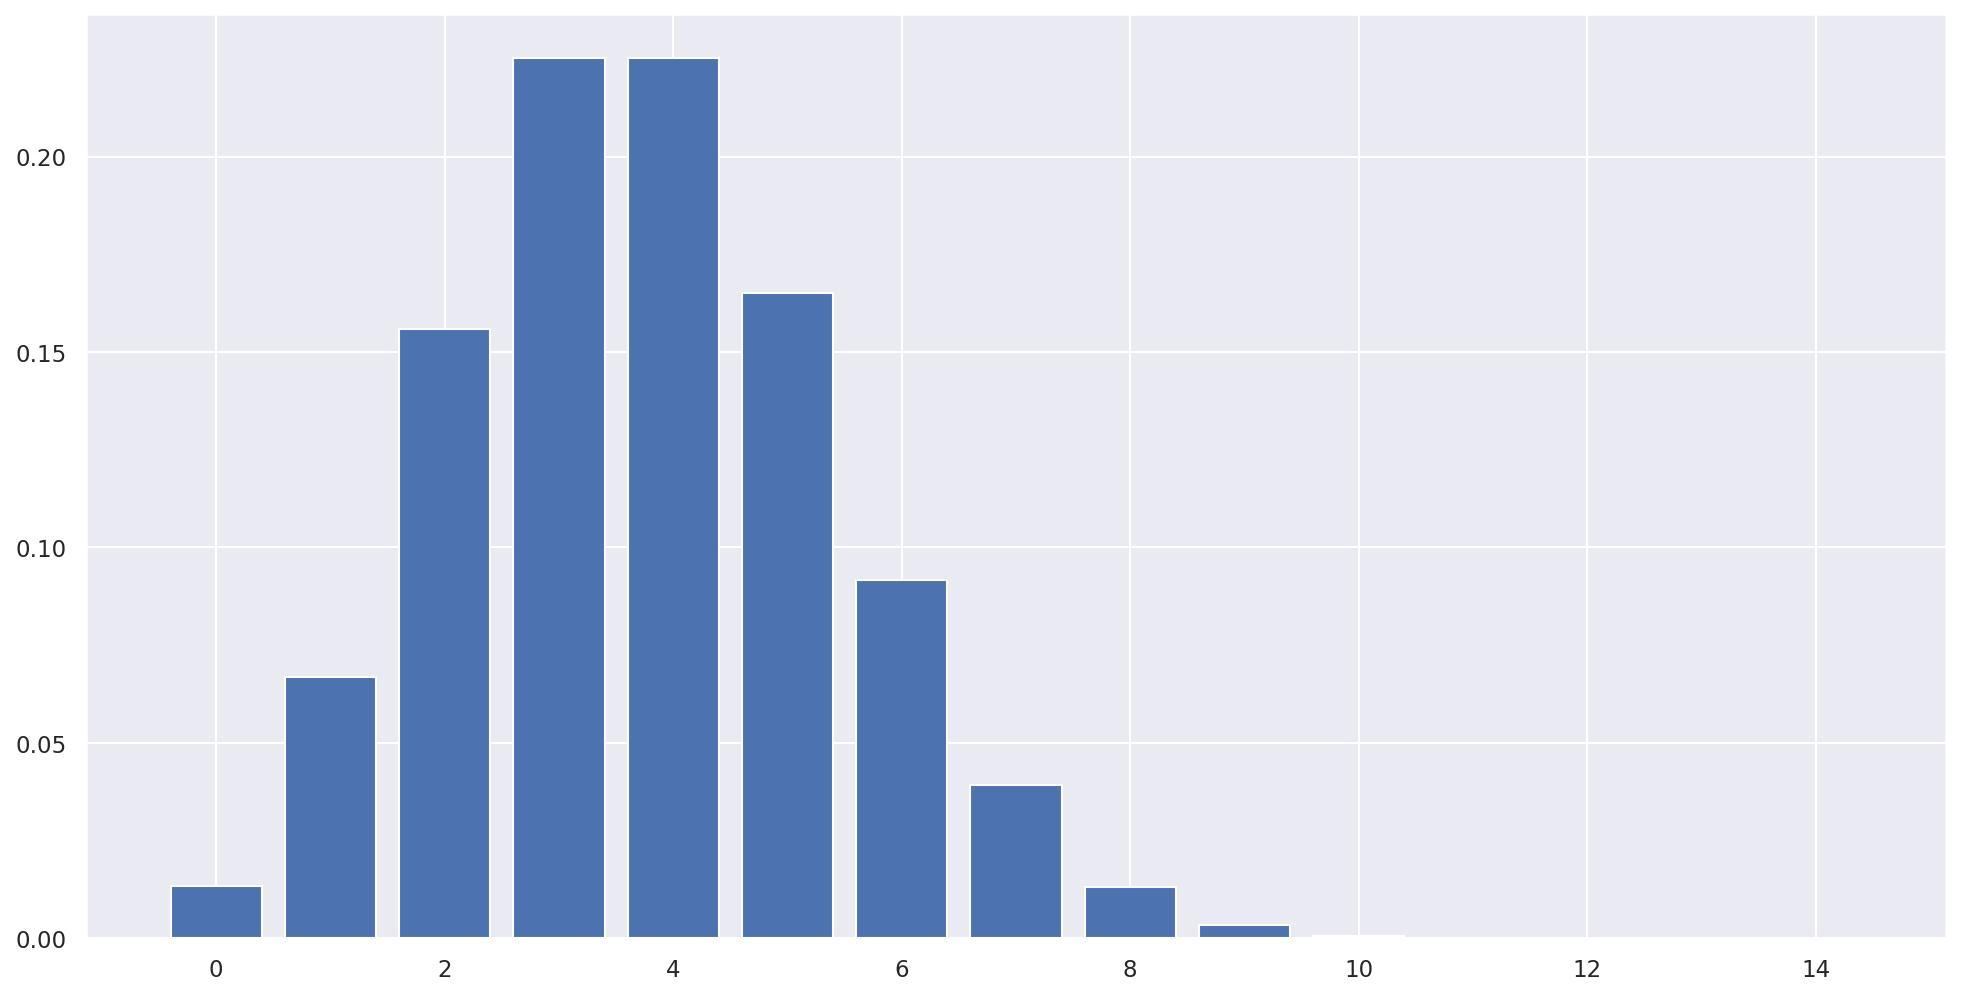

In [15]:
possible_values = np.arange(15)
all_probabilities = stats.binom.pmf(possible_values, 15, 0.25)
plt.bar(possible_values, all_probabilities);

<a id='multinomial'></a>
# Multinomial Distribution

We just defined the binomial distribution as number of sucesses in $n$ trials. When we flip a coin, our coin can land in one of 2 categories: heads or tails. We can extend this to multiple classes. If we were drawing from a jar of red, green, and white balls with replacement, we can calculate the distribution of how many red, green, and white balls we chose. 

In the binomial case, when we calculate the probability of getting k successes, we are also essentially saying we want to get n - k failures. In the multinomial case with more than 2 categories, we have to define ourselves how many we want in each category.

The formula for calculating the multinomial distribution is as follows:

$$P(N_1 = n_1, N_2 = n_2, ..., N_k = n_k) = \frac{n!}{n_1!n_2!...n_k!}p_1^{n_1}p_2^{n_2}...p_k^{n_k}$$

where $n_i \geq 0$ for $1 \leq i \leq k$ and $\sum_{i=1}^{k}p_i = 1$ and $\sum_{i=1}^{k}n_i = n$

**Exercise**: Suppose you have a box of 10 red, 7 green, and 3 white balls. You draw one ball from the box at random with replacement a total of 10 times. What is the probability you choose 6 red, 2 green, and 2 white balls?

In [16]:
n = 10   # number of trials
k = [6, 2, 2] # array of what we want our sample to look like; should sum to n
p = [10/20, 7/20, 3/20] # array of the probabilities of falling into each category; should sum to 1
stats.multinomial.pmf(k, n, p)

0.054263671875000155

<a id='geometric'></a>
# Geometric Distribution

While the binomial distribution answers the question of "How many sucesses in $n$ trials", the geometric distribution answers, "How many trials do we need to run to get our first success?".

If a random variable $X$ has a $Geometric(p)$ distribution, then:

$$P(X=k) = (1-p)^{k-1}p$$ 

**Exercise**: Suppose you have a biased coin that lands heads with probability 0.8. Find the probability that it takes you 6 tosses to get your first head.

In [17]:
prob_6_trials = ((1-0.8)**5) * 0.8
prob_6_trials

0.0002559999999999997

<a id='hypergeometric'></a>
# Hypergeometric Distribution

Though it has geometric in the name, a hypergeometric distribution is actually not super related to the geometric distribution. The hypergeometric distribution is more similar to the multinomial distribution with one main difference: the multinomial distribution is for drawing with replacement, while the hypergeometric distribution is for drawing without replacement (ex. drawing a sample). A hypergeometric distribution is used in the following scenario taken from the Data 140 textbook:

Suppose you have a population of a fixed size $N$, and suppose you are interested in a particular group of those $N$ individuals. Let’s call them “successes” or “good elements”. For example, you might be interested in:

- a population of voters, and among them the group who will vote for a particular candidate

- a population of households, and among them the group that have annual incomes below $50,000

- a deck of cards, and the suit of diamonds

Let $N = G + B$ where $G$ is the number of good elements and $B$ the remaining number of elements which we will unkindly describe as “bad”.

Now suppose you take a simple random sample (SRS) of  elements from the population.

Let $X$ be the number of good elements in the sample. What is the distribution of $X$?

$$P(X=g) = \frac{{G \choose g} {B \choose b}}{{N \choose n}}, g + b = n$$

We can also use the `scipy.stats` library, documentation is [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hypergeom.html), to calculate the probability in Python.

**Example:** Suppose we have a standard deck of cards with 52 cards, and within the 52 cards, there are 13 suits and 4 cards of each suit. We decide to randomly pick 5 cards from the shuffled deck. What is the probability that we get 2 Aces within the 5 cards that we sampled?

In [18]:
g = 2  # how many good elements we want to choose
N = 52 # population size
G = 4  # number of good elements in population
n = 5  # simple random sample size
stats.hypergeom.pmf(g, N, G, n)

# Alternate solution: scipy.special.comb(4, 2) * scipy.special.comb(48, 3) / scipy.special.comb(52, 5)

0.039929818081078594

**Exercise:** Suppose we have a standard deck of cards with 52 cards, and within the 52 cards, there are 13 suits and 4 cards of each suit. We decide to randomly pick 4 cards from the shuffled deck. What is the probability that all of the cards we sampled are face cards (J, Q, K)?

In [19]:
g = 4  # how many good elements we want to choose
N = 52  # population size
G = 12  # number of good elements in population
n = 4  # simple random sample size
stats.hypergeom.pmf(g, N, G, n)

# Alternate solution: scipy.special.comb(12, 4) * scipy.special.comb(50, 0) / scipy.special.comb(52, 4)

0.0018284236771631743

<a id='ref'></a>
# Resources

[Data 140 Textbook](http://prob140.org/textbook/content/README.html)